In [4]:
import sys
from pathlib import Path

project_root = Path().resolve().parent   
sys.path.insert(0, str(project_root / "src"))

In [6]:
import pandas as pd
import numpy as np
from features import make_transformer, engineer
from evaluator import ModelEvaluator

In [8]:
train_df = pd.read_parquet("../Data/train_final_v3.parquet")
val_df = pd.read_parquet("../Data/validationA_v3.parquet")
valB_df = pd.read_parquet("../Data/validationB_v3.parquet")
test_df = pd.read_parquet("../Data/test_v3.parquet")

In [10]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(112768, 791)
(24164, 791)
(40274, 791)


In [12]:
X_train = train_df.drop(columns=['match'], axis=1)
X_val = val_df.drop(columns=['match'], axis=1)
X_valB = valB_df.drop(columns=['match'], axis=1)
X_test = test_df.drop(columns=['match'], axis=1)
y_train = train_df['match']
y_val = val_df['match']
y_valB = valB_df['match']
y_test = test_df['match']

In [14]:
transformer = make_transformer(engineer(X_train), r=50, s=10)
X_train_proc = transformer.fit_transform(engineer(X_train))
X_val_proc = transformer.transform(engineer(X_val))
X_test_proc = transformer.transform(engineer(X_test))

In [16]:
import joblib

model_5 = joblib.load("../Models/model_5.pkl")
model_7 = joblib.load("../Models/model_7.pkl")
model_8 = joblib.load("../Models/model_8.pkl")
voting2 =  joblib.load("../Models/voting2.pkl")

 Evaluating Logistic Regresion
   Recall=0.7713 | F1=0.4409 | PR-AUC=0.0974
              precision    recall  f1-score   support

           0      0.998     0.729     0.843     40000
           1      0.020     0.814     0.039       274

    accuracy                          0.729     40274
   macro avg      0.509     0.771     0.441     40274
weighted avg      0.992     0.729     0.837     40274

 Evaluating RandomForest
   Recall=0.7599 | F1=0.4205 | PR-AUC=0.1184
              precision    recall  f1-score   support

           0      0.998     0.677     0.807     40000
           1      0.018     0.843     0.034       274

    accuracy                          0.678     40274
   macro avg      0.508     0.760     0.421     40274
weighted avg      0.992     0.678     0.801     40274

 Evaluating XGBoost
   Recall=0.7653 | F1=0.4388 | PR-AUC=0.0980
              precision    recall  f1-score   support

           0      0.998     0.724     0.839     40000
           1      0.020   

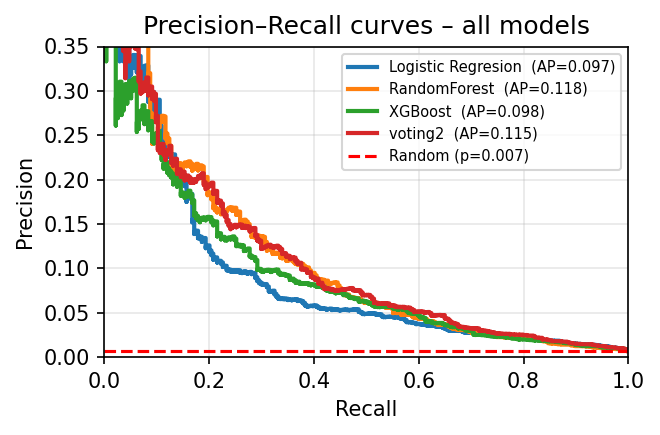

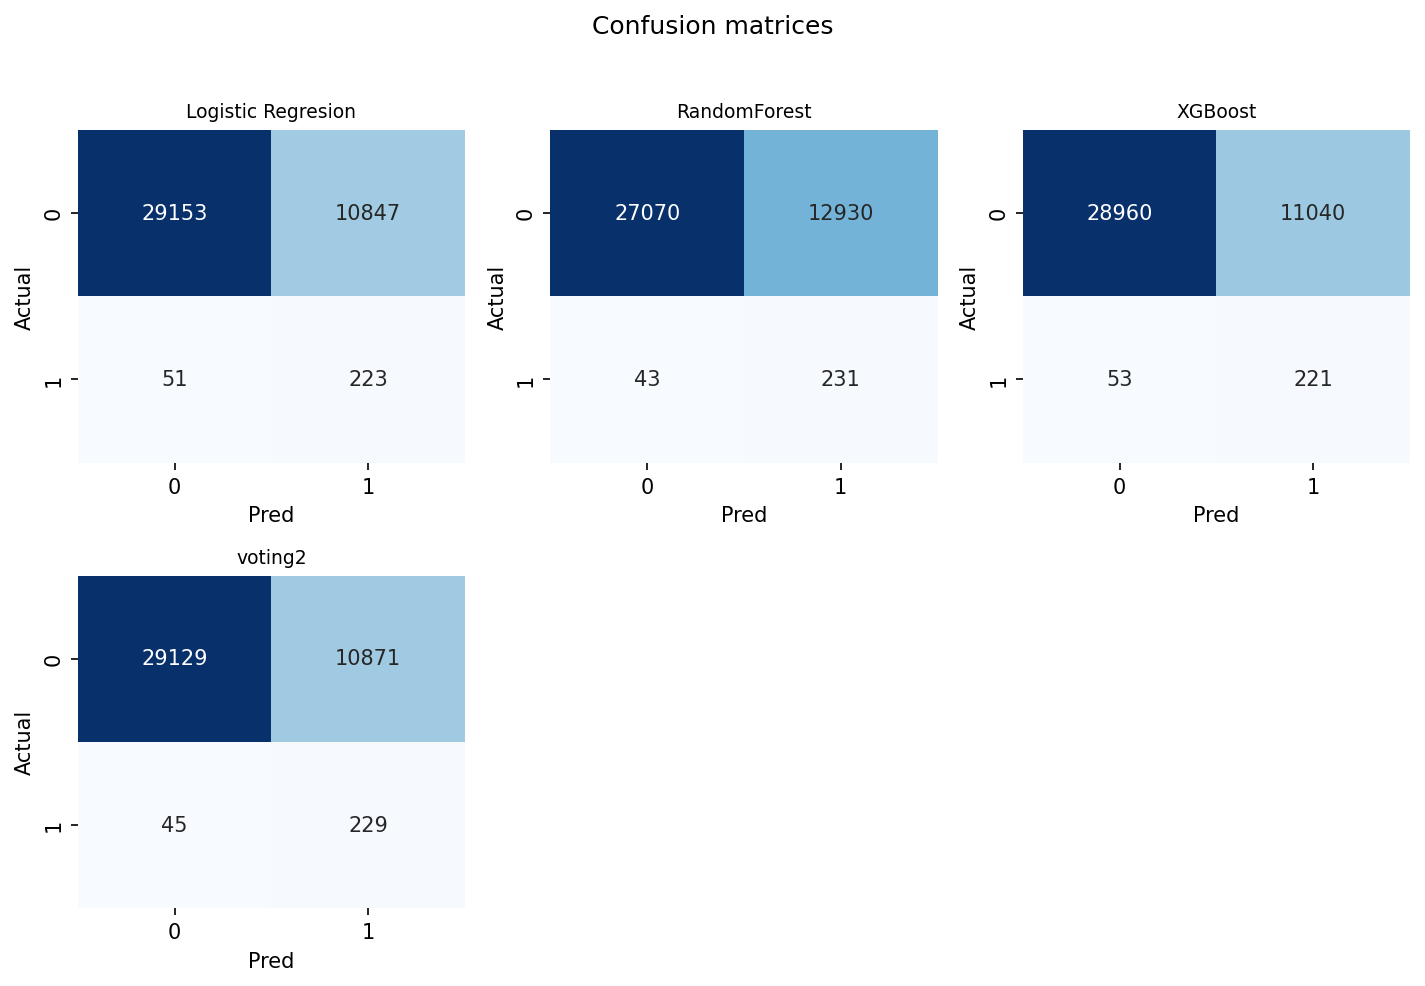

                    recall_macro  f1_macro    pr_auc
voting2                 0.781996  0.441231  0.115009
Logistic Regresion      0.771347  0.440920  0.097359
XGBoost                 0.765285  0.438790  0.097957
RandomForest            0.759908  0.420543  0.118420


In [24]:
evaluator = ModelEvaluator({"Logistic Regresion": model_5, "RandomForest": model_7, "XGBoost": model_8, 'voting2':voting2})
results_df = evaluator.evaluate(X_test_proc, y_test, ylim=0.35, plot_cm=True)
print(results_df)